About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset

Link: Dataset_link

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

1.Defining Problem Statement and Analysing
basic metrics
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1.Defining Problem statement
problem_statement = "Netflix aims to make data-driven decisions to determine the types of shows/movies to produce and develop strategies for business growth in various countries."
print(problem_statement)

Netflix aims to make data-driven decisions to determine the types of shows/movies to produce and develop strategies for business growth in various countries.


In [ ]:
#using wget command to download the netflix_titles.csv dataset
!wget "https://drive.google.com/uc?export=download&id=1h4teqB6CQM4MODni5DyBIFiO7ip1M6WVGHKmPjlgmD4" -O netflix_titles.csv

--2024-05-26 17:27:35--  https://drive.google.com/uc?export=download&id=1h4teqB6CQM4MODni5DyBIFiO7ip1M6WVGHKmPjlgmD4
Resolving drive.google.com (drive.google.com)... 74.125.23.113, 74.125.23.102, 74.125.23.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1h4teqB6CQM4MODni5DyBIFiO7ip1M6WVGHKmPjlgmD4&export=download [following]
--2024-05-26 17:27:36--  https://drive.usercontent.google.com/download?id=1h4teqB6CQM4MODni5DyBIFiO7ip1M6WVGHKmPjlgmD4&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.203.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercont

In [ ]:
#using pandas read the csv file using readcsv function
df=pd.read_csv("netflix_titles.csv")

ParserError: Error tokenizing data. C error: Expected 331 fields in line 7, saw 3517


2.Observations on shape of data, data types of all the attributes, conversion of
categorical attributes to 'category' (If required), missing value detection,
statistical summary


2.1 Shape of Data

In [ ]:
df.shape

Analysis: df dataframe has 8807 rows and 12 columns

2.2 Datatypes of all attributes in the Dataframe

In [ ]:
df.dtypes

3 Non-Graphical Analysis: Value counts and unique attributes
3.1 UNIQUE ATTRIBUTES

In [ ]:
for i in df.columns:
  print(i,":",df[i].nunique())

OBSERVATION - show_id and title attributes have unique values

5 A Missing Value Detection

In [ ]:
df.columns

In [ ]:
for i in df.columns:
  print(i,":",df[i].isnull().sum())

We could see null entries in the director,cast,country,date_added,rating and duration attributes

Analysing the rating attribute that it has valid values

In [ ]:
df.groupby('rating').aggregate({"show_id":"count"})
df['rating'].value_counts()

Found that three values - 74 min,84min and 66 min are incorrectly entered in the rating column instead of duration column

could see multiple names in the director column which will be difficult to analyse the date

Going to follow the unstack and stack here for director,cast,listed_in and country columns

In [ ]:
df[df['director']=='Raj Nidimoru, Krishna D.K.']

Unnesting the Director column

In [ ]:
con1=df['director'].apply(lambda x:str(x).split(',')).tolist()

In [ ]:
df_new_director=pd.DataFrame(con1,index=df['title'])
df_new_director1=df_new_director.stack()
df_new_director=pd.DataFrame(df_new_director1.reset_index())
df_new_director.head()
df_new_director.drop("level_1",axis=1,inplace=True)
df_new_director.rename(columns={0:'director'},inplace=True)
df_new_director.head()

Unnesting the Cast column

In [ ]:
con2=df['cast'].apply(lambda x:str(x).split(',')).to_list()
con2


In [ ]:
df_new_actor=pd.DataFrame(con2,index=df['title'])
df_new_actor.head(20)
df_new_actor1=df_new_actor.stack()
df_new_actor1
df_new_actor=pd.DataFrame(df_new_actor1.reset_index())
df_new_actor.drop("level_1",axis=1,inplace=True)
df_new_actor.rename(columns={0:"Actor"},inplace=True)
df_new_actor.head(20)

Unnesting the listed in column

In [ ]:
con3=df['listed_in'].apply(lambda x:str(x).split(',')).to_list()
df_new_genre=pd.DataFrame(con3,index=df['title'])
df_new_genre1=df_new_genre.stack()
df_new_genre1.reset_index()
df_new_genre=pd.DataFrame(df_new_genre1.reset_index())
df_new_genre.drop('level_1',axis=1,inplace=True)
df_new_genre.rename(columns={0:'genre'},inplace=True)
df_new_genre.head(5)


Unnesting the country columns

In [ ]:
con4=df['country'].apply(lambda x:str(x).split(',')).to_list()
df_new_country=pd.DataFrame(con4,index=df['title'])
df_new_country1=df_new_country.stack()
df_new_country=pd.DataFrame(df_new_country1.reset_index())
df_new_country.head()
df_new_country.drop('level_1',axis=1,inplace=True)
df_new_country.rename(columns={0:"country"},inplace=True)
df_new_country.head()



Merge Director unnested dataframe with Actor dataframe and the combined one with genre dataframe followed by Country dataframe
Replace the null value of director and actor with unknown director and actor respectively

In [ ]:
df_new_1=df_new_director.merge(df_new_actor,how='inner',on=["title"])
df_new_2=df_new_1.merge(df_new_genre,how='inner',on=['title'])
df_new_3=df_new_2.merge(df_new_country,how='inner',on=['title'])


df_new_3['director'].replace(['nan'],['Unknown Director'],inplace=True)
df_new_3['Actor'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new_3['country'].replace(['nan'],[np.nan],inplace=True)
df_new_3.head()


Merge the merged dataframe of Director,actor,listed_in and country with master one using the left join

In [ ]:
df_final=df_new_3.merge(df[['show_id','title','type','date_added','release_year','rating','duration']],on=['title'],how='left')
df_final.head(5)
df_final.isnull().sum()
df_final[df_final['country']=='Unknown Country']['country'].count()


Count the value of null across all the columns in the dataframe

In [ ]:
df_final.isnull().sum()

In [ ]:
df.dtypes

Replace the null value of duration with wrongly inserted duration value in the Rating columns

In [ ]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [ ]:
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

In [ ]:
df_final['release_year'].unique()
unique_rel_year_for_null_release_date=df_final[df_final['date_added'].isnull()]['release_year'].unique()
for i in unique_rel_year_for_null_release_date:
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)


In [ ]:
df_final.isnull().sum()

In [ ]:
df_final['country'].isnull().sum()

In [ ]:
df_final.isnull().sum()

Replacing the NaN values with the mode function based on country,actor and genre

In [ ]:
df_final_director_unique=df_final[df_final['country'].isnull()]['director'].unique()
for i in df_final[df_final['country'].isnull()]['director'].unique():
  if i  in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)

In [ ]:
df_final_director_unique=df_final[df_final['country'].isnull()]['Actor'].unique()
for i in df_final[df_final['country'].isnull()]['Actor'].unique():
  if i  in df_final[~df_final['country'].isnull()]['Actor'].unique():
    imp=df_final[df_final['Actor']==i]['country'].mode().values[0]
    df_final.loc[df_final['Actor']==i,'country']=df_final.loc[df_final['Actor']==i,'country'].fillna(imp)

In [ ]:
df_final_genre_unique=df_final[df_final['country'].isnull()]['genre'].unique()
for i in df_final[df_final['country'].isnull()]['genre'].unique():
  if i  in df_final[~df_final['country'].isnull()]['genre'].unique():
    imp=df_final[df_final['genre']==i]['country'].mode().values[0]
    df_final.loc[df_final['genre']==i,'country']=df_final.loc[df_final['genre']==i,'country'].fillna(imp)

In [ ]:
# df_final_dir_actor_unique=df_final[df_final['director']=='Unknown Director']['Actor'].unique()
# for i in df_final_dir_actor_unique:
#   if i in df_final[~(df_final['director']=='Unknown Director')]['Actor'].unique():
#     imp=df_final[df_final['Actor']==i]['director'].mode().values[0]
#     df_final.loc[df_final['Actor']==i,'director']=df_final.loc[df_final['Actor']==i,'director'].replace('Unknown Director',imp)

In [ ]:
df_final[~(df_final['director']=='Unknown Director')].shape

In [ ]:
df_final.shape

In [ ]:
df_final.isnull().sum()

In [ ]:
df_final[df_final['country'].isnull()]

In [ ]:
df_final.dtypes

In [ ]:
df_final['duration'].value_counts()

In [ ]:
df_final['duration']=df_final['duration'].str.replace('min','')
df_final.head()

In [ ]:
df_final['duration'].unique()

In [ ]:
df_final['duration_copy']=df_final['duration']
df_final1=df_final.copy()



In [ ]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
# df_final1.loc[df_final1['duration_copy'].str.contains('NR'),'duration_copy']=0
df_final1['duration_copy'].unique()

In [ ]:
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1['duration_copy'].describe()

duration columns is converted into continuous to categorical attribute

In [ ]:
bins1=[-1,1,50,80,100,120,150,200,314]
labels1=['<1','1-50','50-80','80-100','100-120','120-150','150-200','300-315']
df_final1['duration_copy']=pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

In [ ]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop('duration_copy',axis=1,inplace=True)
df_final1.head()


In [ ]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime("%Y-%m-%d"))
df_final1['Modified_Added_Date']=arr
df_final1['Modified_Added_Date']=pd.to_datetime(df_final1['Modified_Added_Date'])

Observations on shape of data, data types of all the attributes, conversion of
categorical attributes to 'category' (If required), missing value detection,
statistical summary (10 Points)

Shape of the dataframe

In [ ]:
df_final1['month_added']=df_final1['Modified_Added_Date'].dt.month
df_final1['week_added']=df_final1['Modified_Added_Date'].dt.week
df_final1['year']=df_final1['Modified_Added_Date'].dt.year

In [ ]:
df_final1['country']=df_final1['country'].str.replace(',','')
df_final1['country']=df_final1['country'].apply(lambda x:str(x).strip())

In [ ]:
df_final1

NameError: name 'df_final1' is not defined

df_final1 dataframe has 202065 rows and 11 columns

In [ ]:
df_final1.dtypes

title                          object
director                       object
Actor                          object
genre                          object
country                        object
show_id                        object
type                           object
date_added                     object
release_year                    int64
rating                         object
duration                       object
Modified_Added_Date    datetime64[ns]
month_added                     int64
week_added                      int64
year                            int64
dtype: object

3 Non-Graphical Analysis: Value counts and unique attributes

Value attributes -

In [ ]:
df_final1['country'].value_counts()

United States     66897
India             24492
United Kingdom    13049
Japan              9130
France             8450
                  ...  
Panama                2
Palestine             2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country, Length: 123, dtype: int64

In [ ]:
df_final1['release_year'].value_counts()

2018    24441
2019    21931
2017    20516
2020    19697
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df_final1['director'].value_counts()

Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: director, Length: 5121, dtype: int64

In [ ]:
df_final1['Actor'].value_counts()

Unknown Actor            2149
 Alfred Molina            160
 Salma Hayek              130
 Frank Langella           128
 John Rhys-Davies         125
                         ... 
 Cle Sloan                  1
 George Konner              1
 Andy Hayward               1
 Lyric Lewis                1
 Trent 'Maxi' Maxwell       1
Name: Actor, Length: 39297, dtype: int64

Univariate Analysis of each columns

In [ ]:
df_final1['release_year'].value_counts()

2018    24441
2019    21931
2017    20516
2020    19697
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df_final1['rating'].value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

4. Visual Analysis
Countries vs movies - Top 50 countries

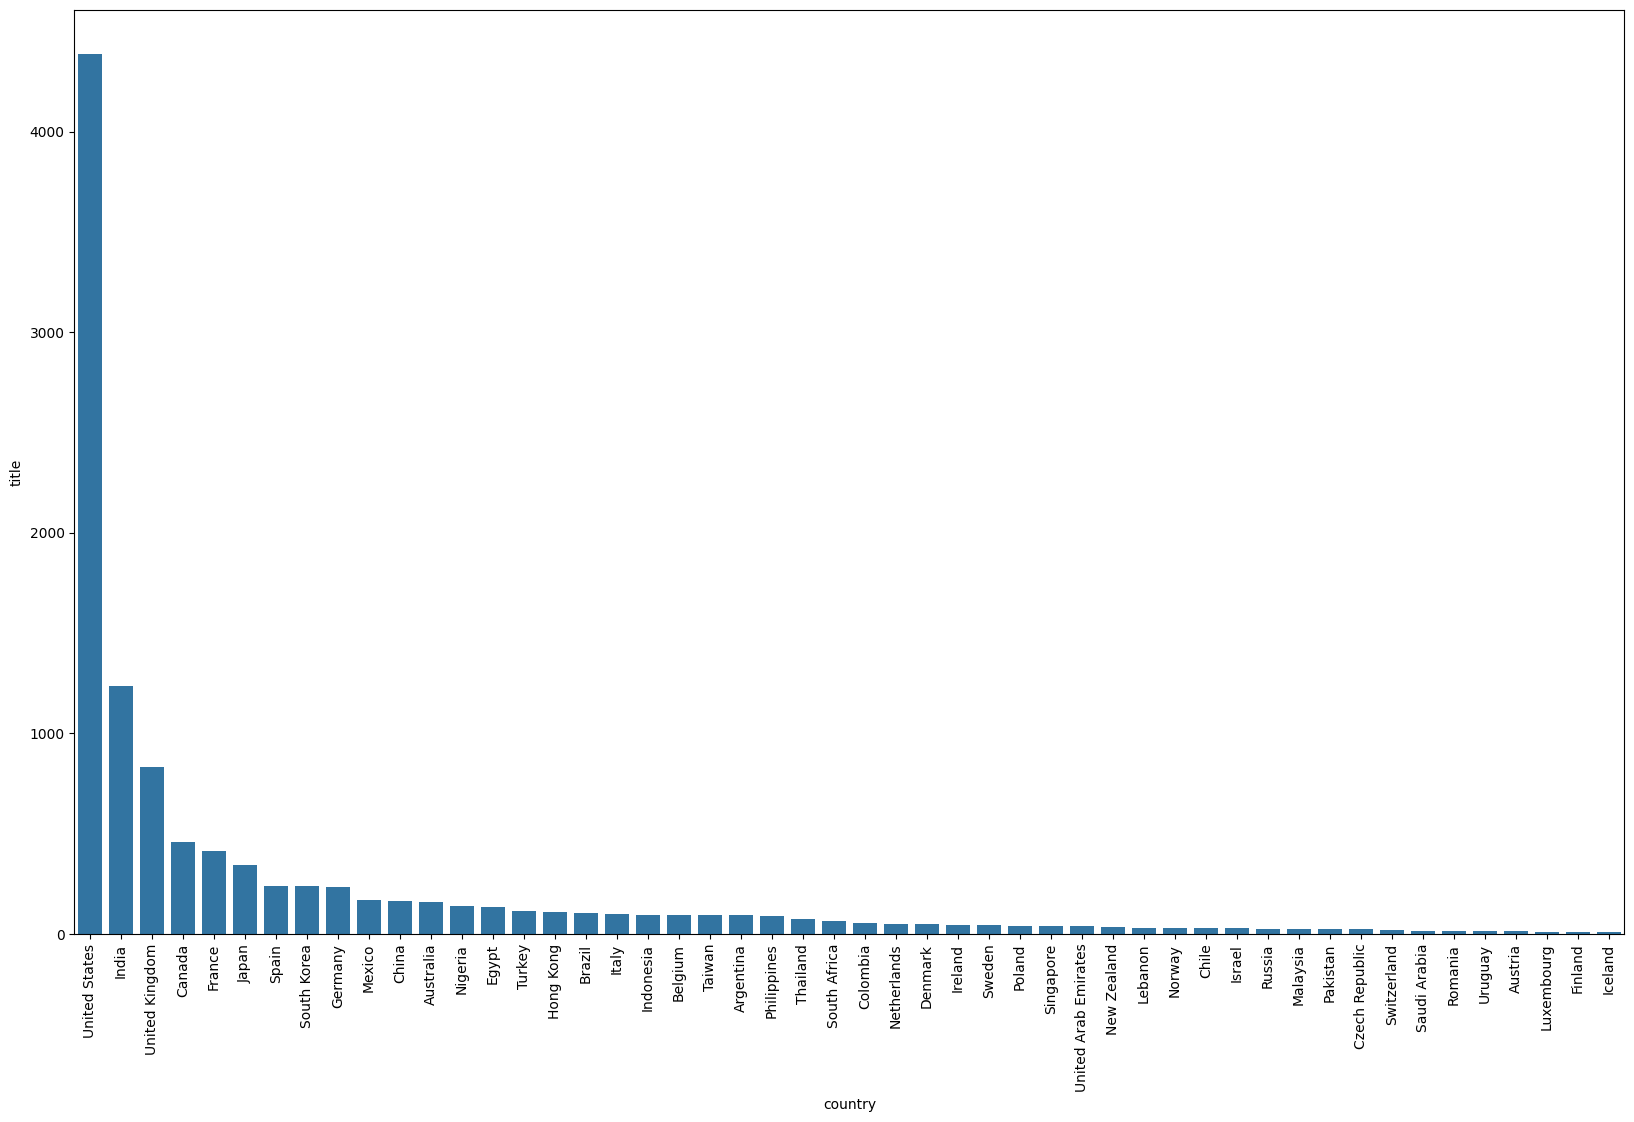

In [ ]:
df_final_movies_country=df_final1.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_final_movies_country=df_final_movies_country.head(50)
# df_final_movies_country[df_final_movies_country['country']=='United States']['title'].nunique()

plt.figure(figsize=(20,12))
sns.barplot(data=df_final_movies_country,x=df_final_movies_country['country'],y=df_final_movies_country['title'])
plt.xticks(rotation=90,fontsize=10)
plt.show()



US, India and UK top the countries list on the contents available in the Netflix

Directore movies count

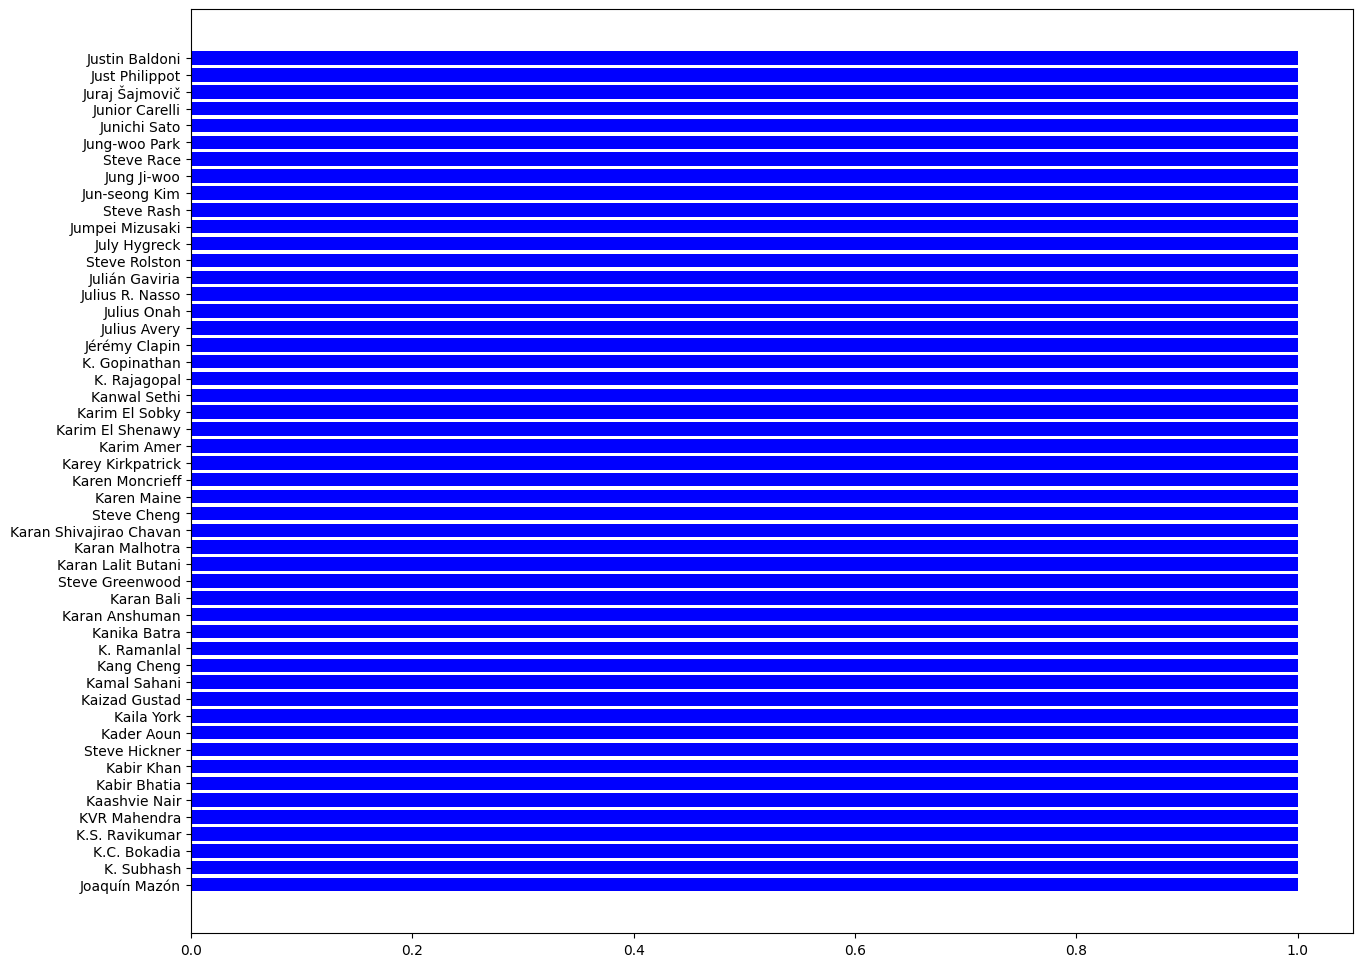

In [ ]:
df_director_movies=df_final1.groupby('director').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=True)
df_director_movies=df_director_movies[df_director_movies['director']!='Unknown Director']
df_director_movies=df_director_movies.head(50)
plt.figure(figsize=(15,12))
plt.barh(df_director_movies['director'],df_director_movies['title'],color='blue')
plt.show()

Justin Baldoni is topping the list of the director who directed more conents in the Netflix

Actors movie count

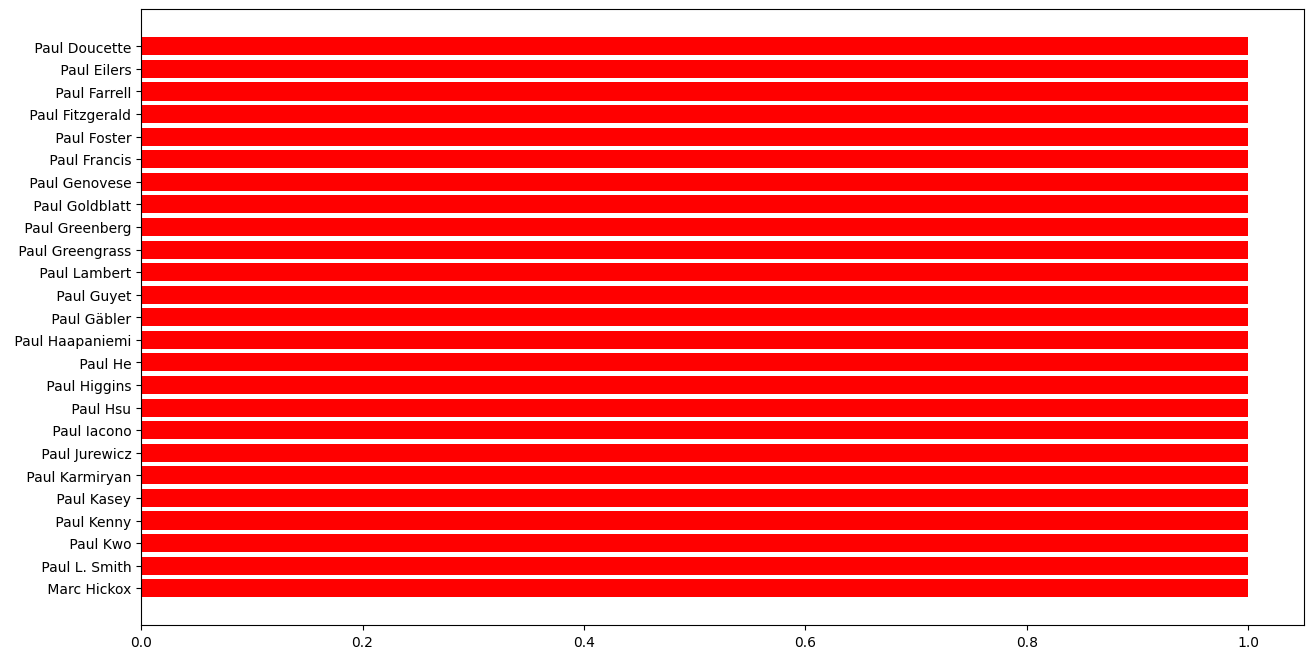

In [ ]:
df_Actor_movies=df_final1.groupby('Actor').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=True)
df_Actor_movies=df_Actor_movies[df_Actor_movies['Actor']!='Unknown Actor']
df_Actor_movies=df_Actor_movies.head(25)
plt.figure(figsize=(15,8))
plt.barh(df_Actor_movies['Actor'],df_Actor_movies['title'],color='red')
plt.show()

Paul Doucette is topping the list of the actors who directed more conents in the Netflix

Univariate Analysis for Release Year after 1980

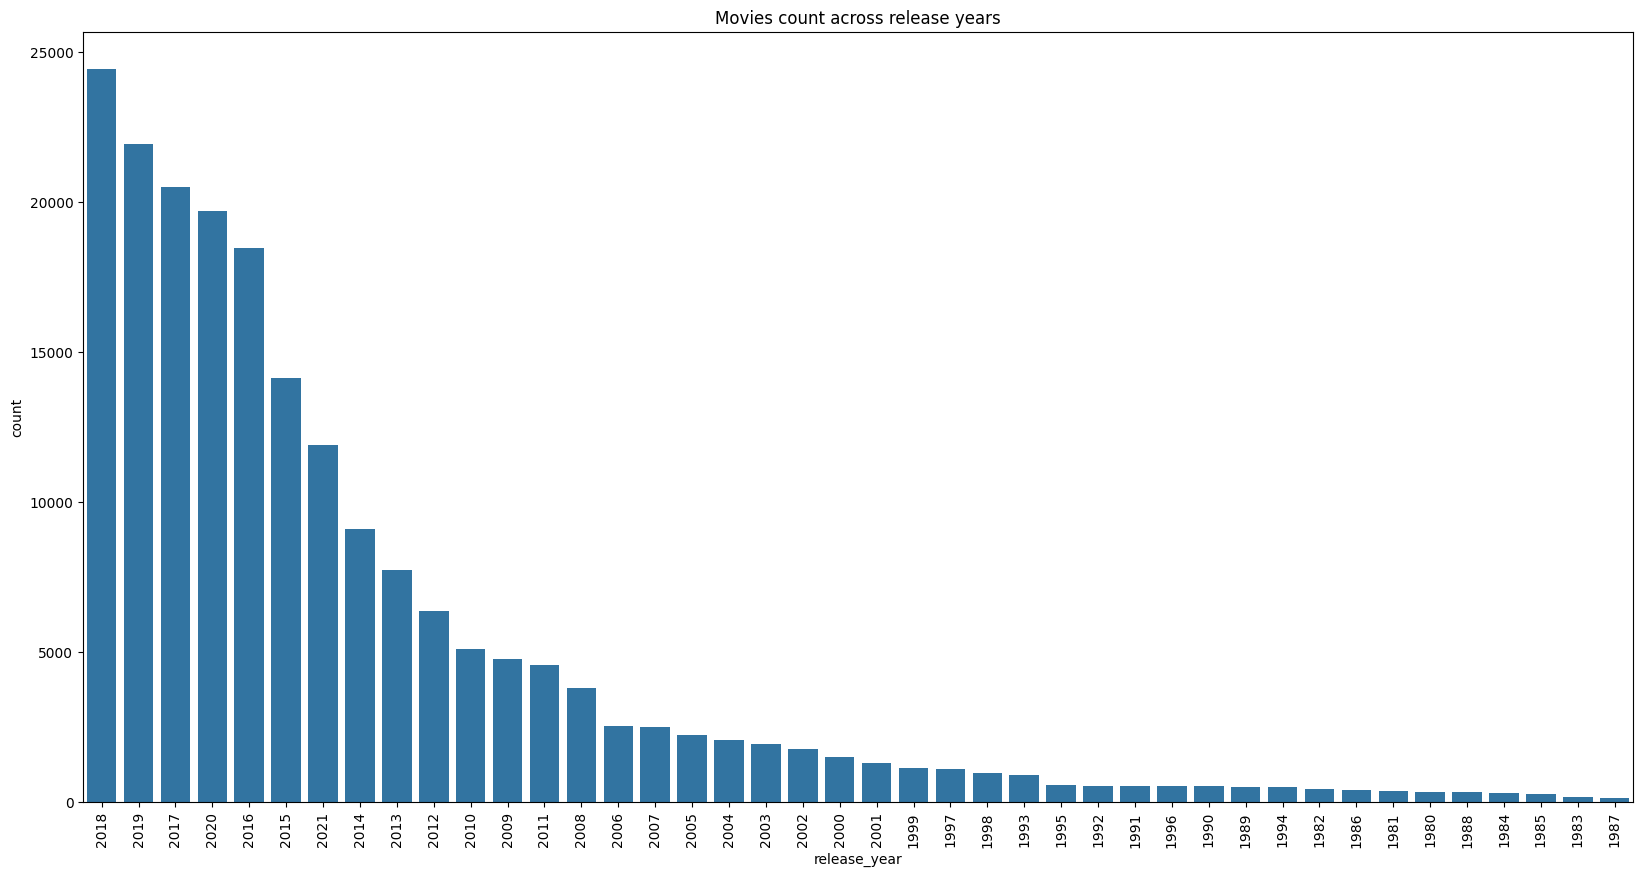

In [ ]:
plt.figure(figsize=(20,10))
df_final_year_split=df_final1[ df_final1['release_year']>=1980]
sns.countplot(data=df_final_year_split,x='release_year',order=df_final_year_split['release_year'].value_counts().index)
plt.title(label="Movies count across release years",fontsize=12)
plt.xticks(rotation=90)

plt.show()


2018 year has more released year contents in the Netflix

Univariate Analysis for duration

In [ ]:
df_final_duration=df_final1.groupby('duration').agg({'title':'nunique'}).reset_index()
df_final_duration

,duration,title
0,1 Season,1793
1,1-50,287
2,10 Seasons,7
3,100-120,1672
4,11 Seasons,2
5,12 Seasons,2
6,120-150,897
7,13 Seasons,3
8,15 Seasons,2
9,150-200,226


4 a - Countplot

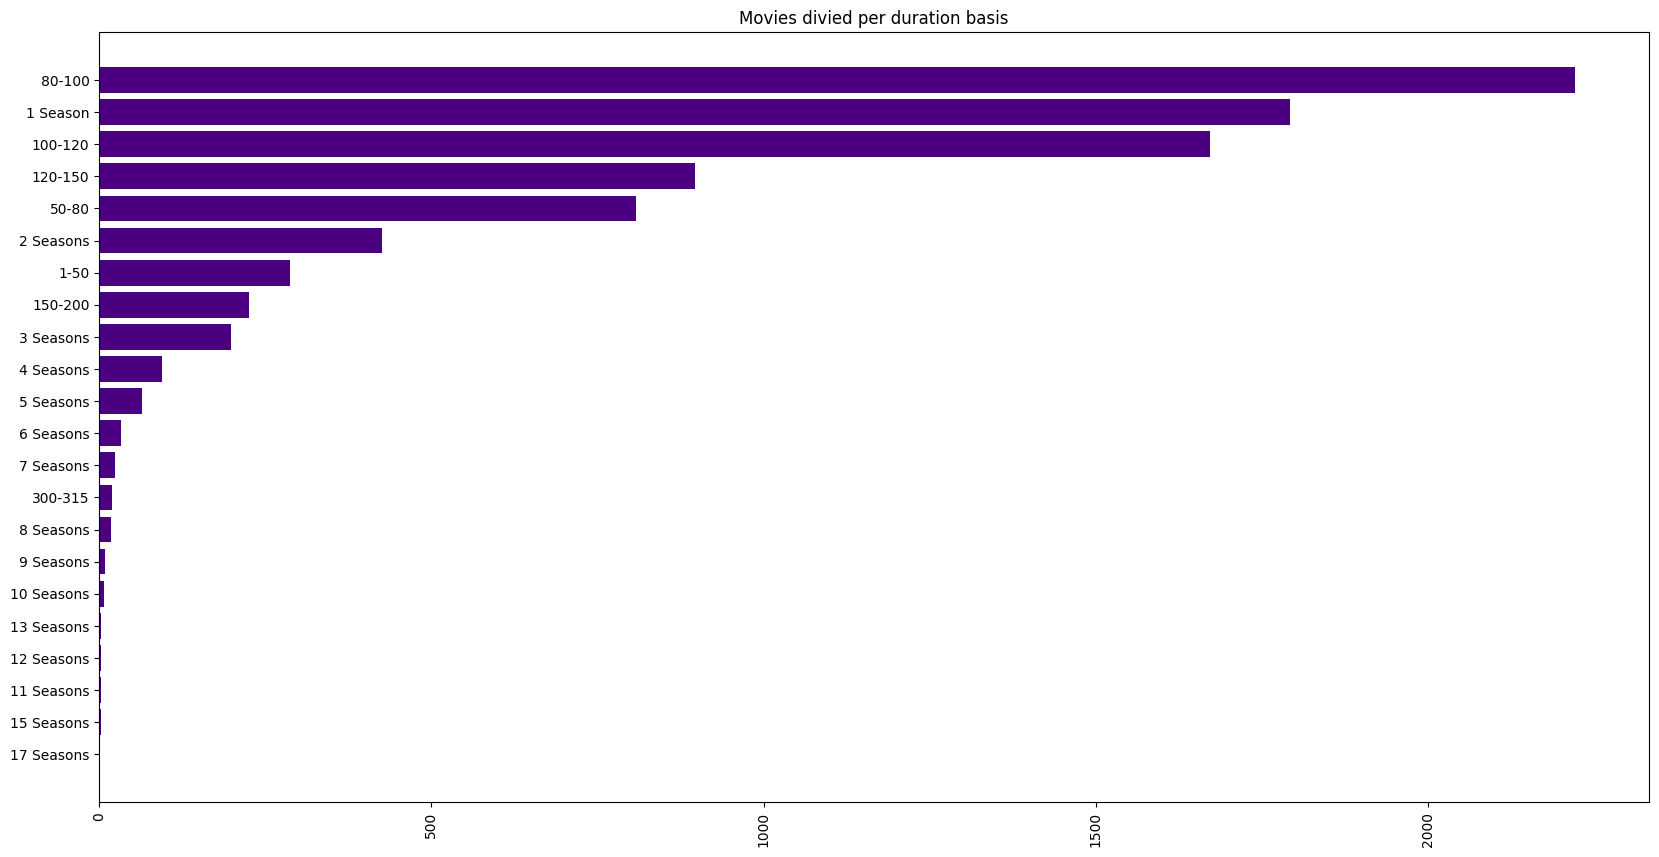

In [ ]:
df_final_duration=df_final1.groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=True)
plt.figure(figsize=(20,10))
plt.barh(df_final_duration['duration'],df_final_duration['title'],color='indigo')
# df_final_year_split=df_final1[ df_final1['release_year']>=1980]
# sns.countplot(data=df_final_duration,x='duration',order=df_final_duration['duration'].value_counts().index)
plt.title(label="Movies divied per duration basis",fontsize=12)
plt.xticks(rotation=90)

plt.show()

Most of the content in the netflix has duration between 80-100

which month of the year more movies getting released

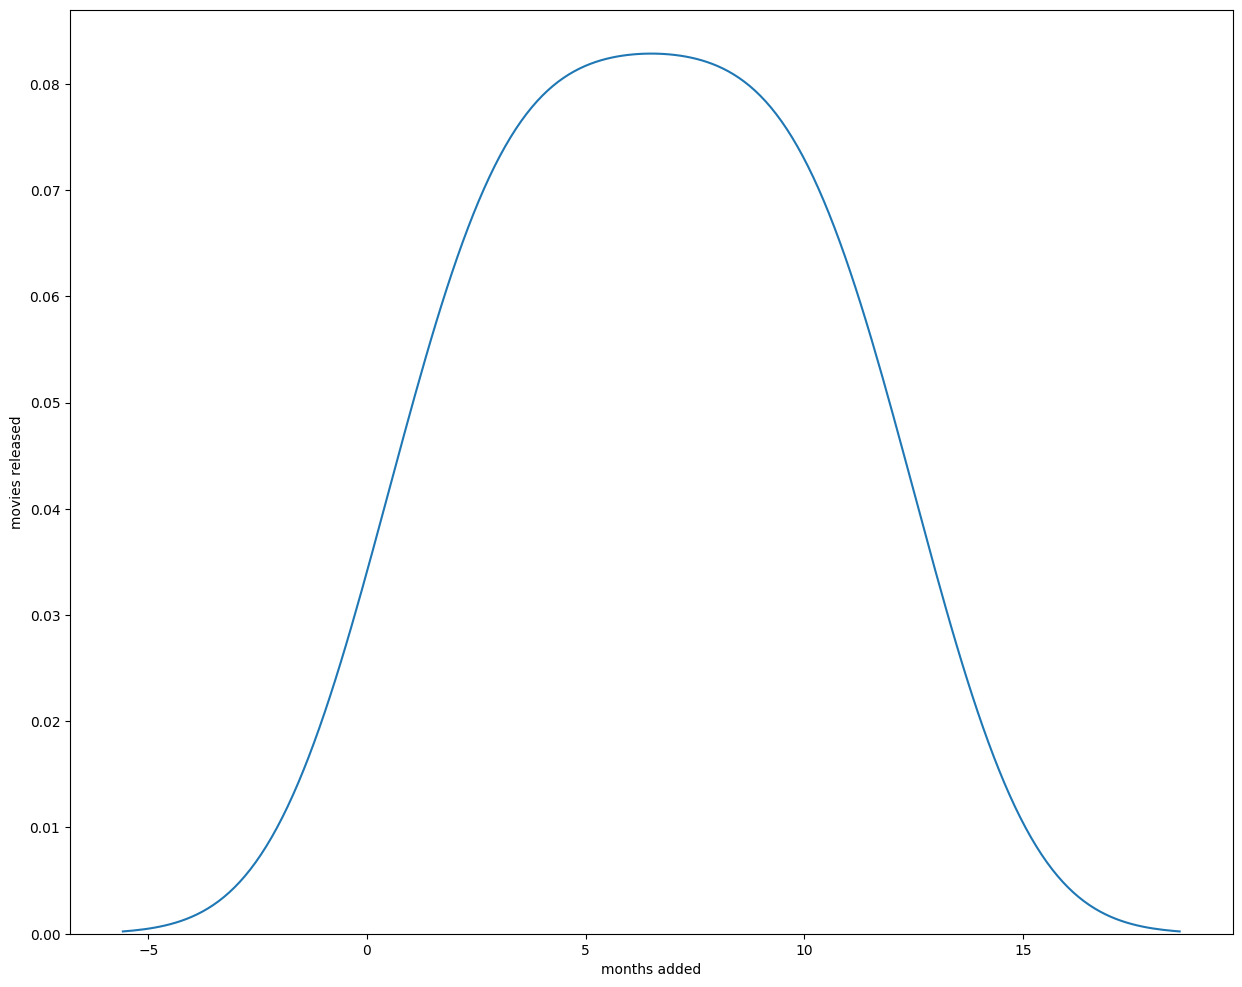

In [ ]:
df_final_month=df_final1.groupby('month_added').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=True)
# df_final_month=df_final_month[df_final_month['director']!='Unknown Director']
df_final_month['month_added']=df_final_month['month_added'].astype('int')

# df_final_month.dtypes
plt.figure(figsize=(15,12))
sns.kdeplot(data=df_final_month,x='month_added')
plt.xlabel('months added')
plt.ylabel('movies released')
plt.show()

week wise movies analysis

4 a - histogram

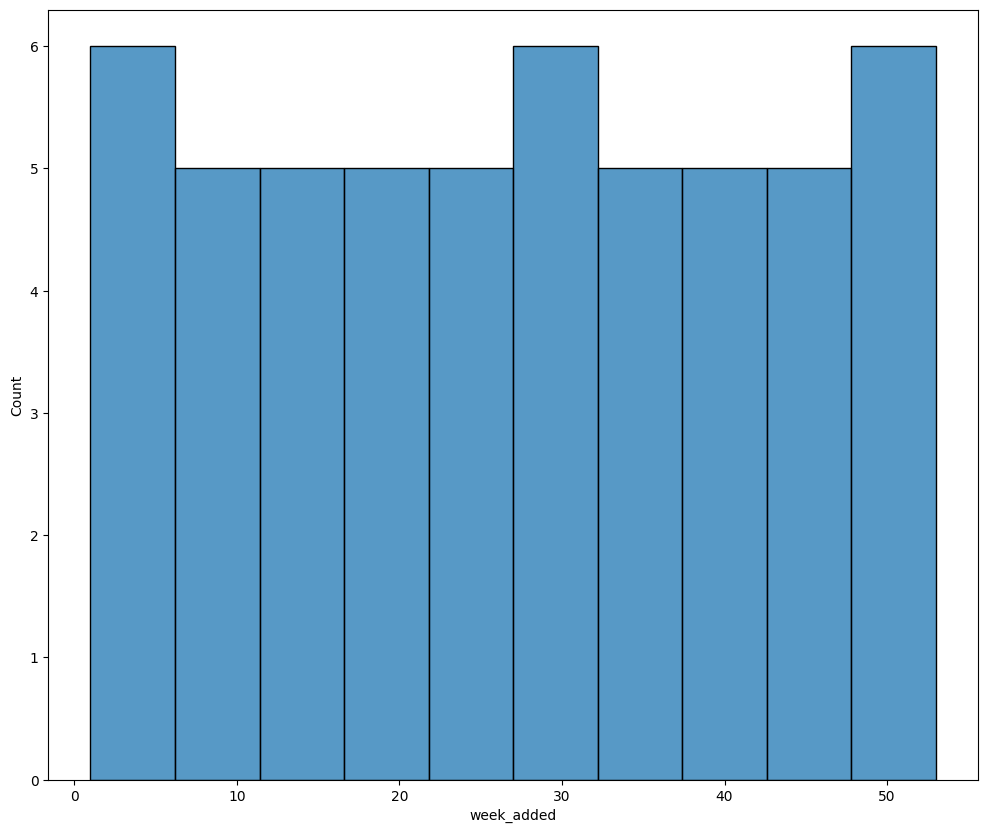

In [ ]:
df_final_movie_week=df_final1.groupby('week_added').agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(12,10))
sns.histplot(data=df_final_movie_week,x='week_added',bins=10)
plt.show()



histogram

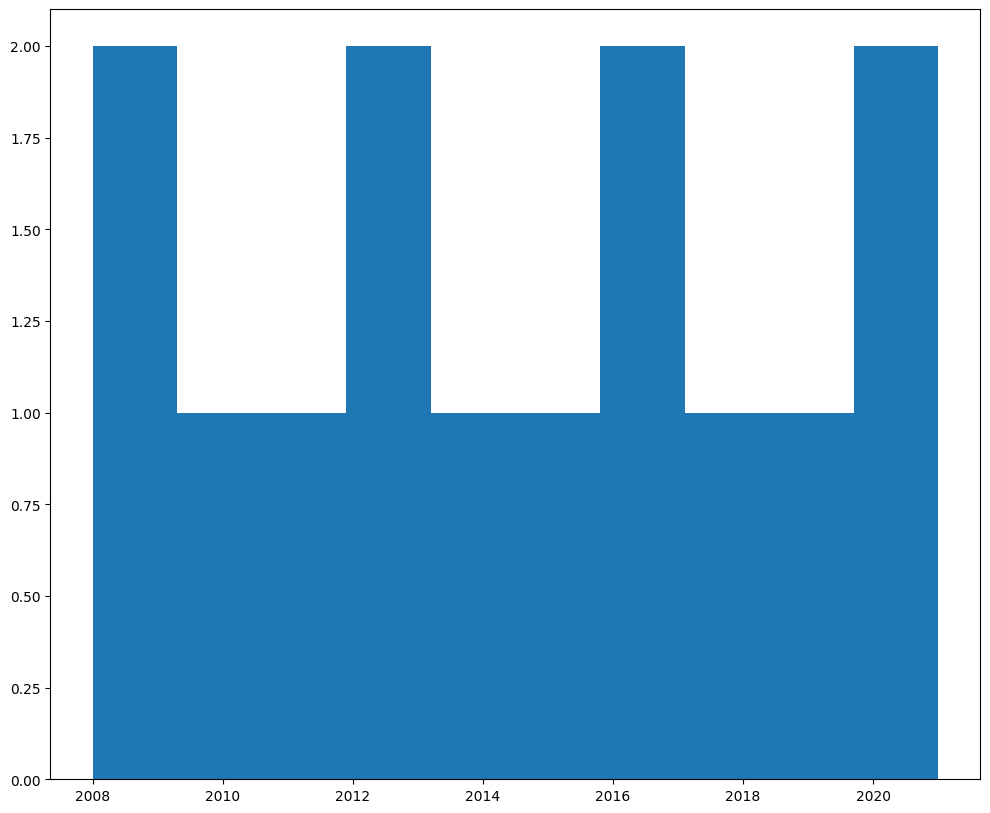

array([2., 1., 1., 2., 1., 1., 2., 1., 1., 2.])

In [ ]:
df_final_movie_year=df_final1.groupby('year').agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(12,10))
count,bins,_=plt.hist(df_final_movie_year['year'])
plt.show()
count

Non-Graphical Analysis: Value counts and unique attributes
Genre and unique titles

In [ ]:
df_final_genre=df_final1.groupby(['genre','country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=True)
df_final_genre[df_final_genre['country']=='United States']



,genre,country,title
1693,Romantic Movies,United States,2
1708,Spanish-Language TV Shows,United States,2
1092,Anime Features,United States,4
3,Anime Features,United States,5
1578,International Movies,United States,7
...,...,...,...
1088,Action & Adventure,United States,428
1169,Children & Family Movies,United States,433
1251,Comedies,United States,448
1374,Documentaries,United States,553


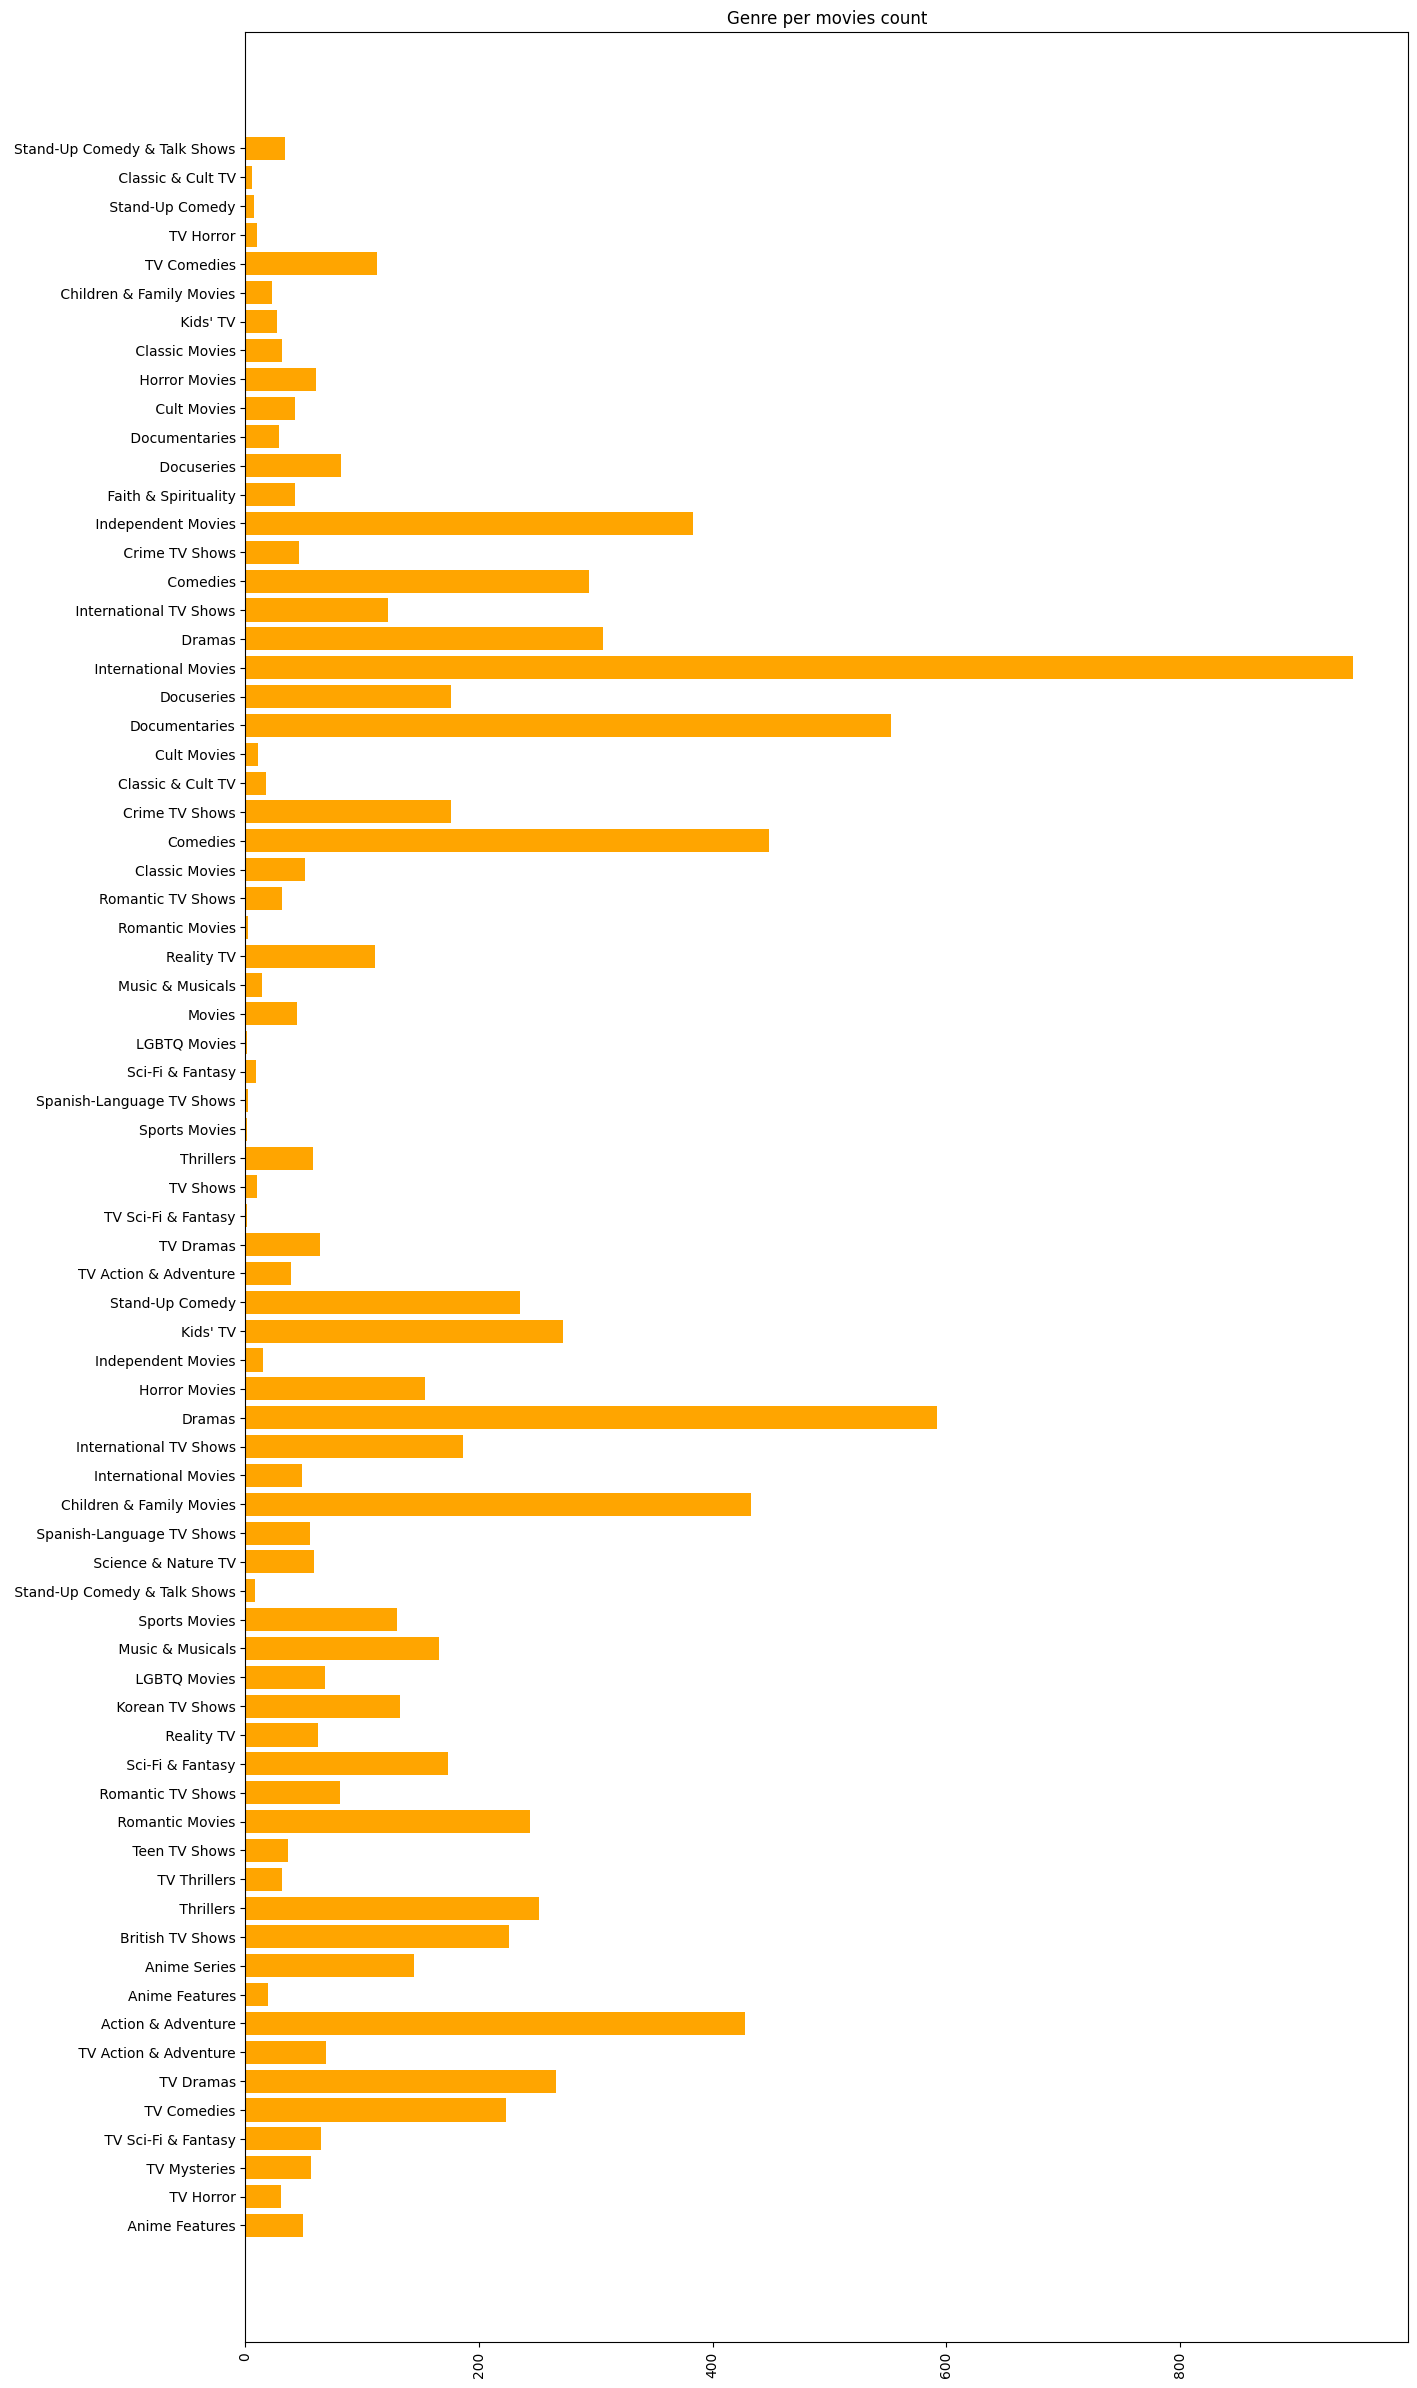

In [ ]:
plt.figure(figsize=(15,30))
# sns.barplot(x=df_final_genre['genre'],y=df_final_genre['title'])
plt.barh(df_final_genre['genre'],df_final_genre['title'],color='orange')
plt.title(label="Genre per movies count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

type of movies and their demands

International movies content is topping the list in the content

In [ ]:
df_final_type=df_final1.groupby('type')['title'].count().reset_index()
df_final_type

,type,title
0,Movie,145917
1,TV Show,56148


 a - Pie chart

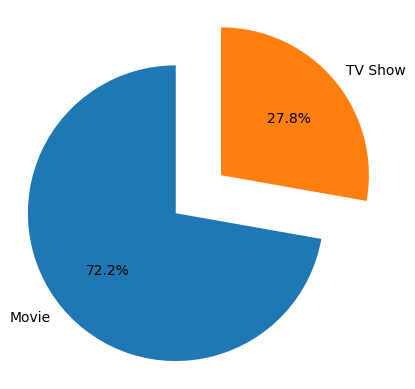

In [ ]:
plt.pie(df_final_type['title'],explode=[0.2,0.2],labels=df_final_type['type'],startangle=90,autopct = "%.1f%%")
plt.show()

Movie has more percentage of content in the Netflix

unique movies per country

In [ ]:
df_final_movies=df_final1.groupby('country').aggregate({'title':'nunique'}).reset_index()
df_final_movies[df_final_movies['title']>100]

,country,title
7,Australia,161
16,Brazil,103
21,Canada,459
24,China,166
34,Egypt,133
37,France,412
39,Germany,233
43,Hong Kong,108
46,India,1234
52,Italy,102


4 B - Boxplot

count      14.0000
mean     2014.5000
std         4.1833
min      2008.0000
25%      2011.2500
50%      2014.5000
75%      2017.7500
max      2021.0000
Name: year, dtype: float64

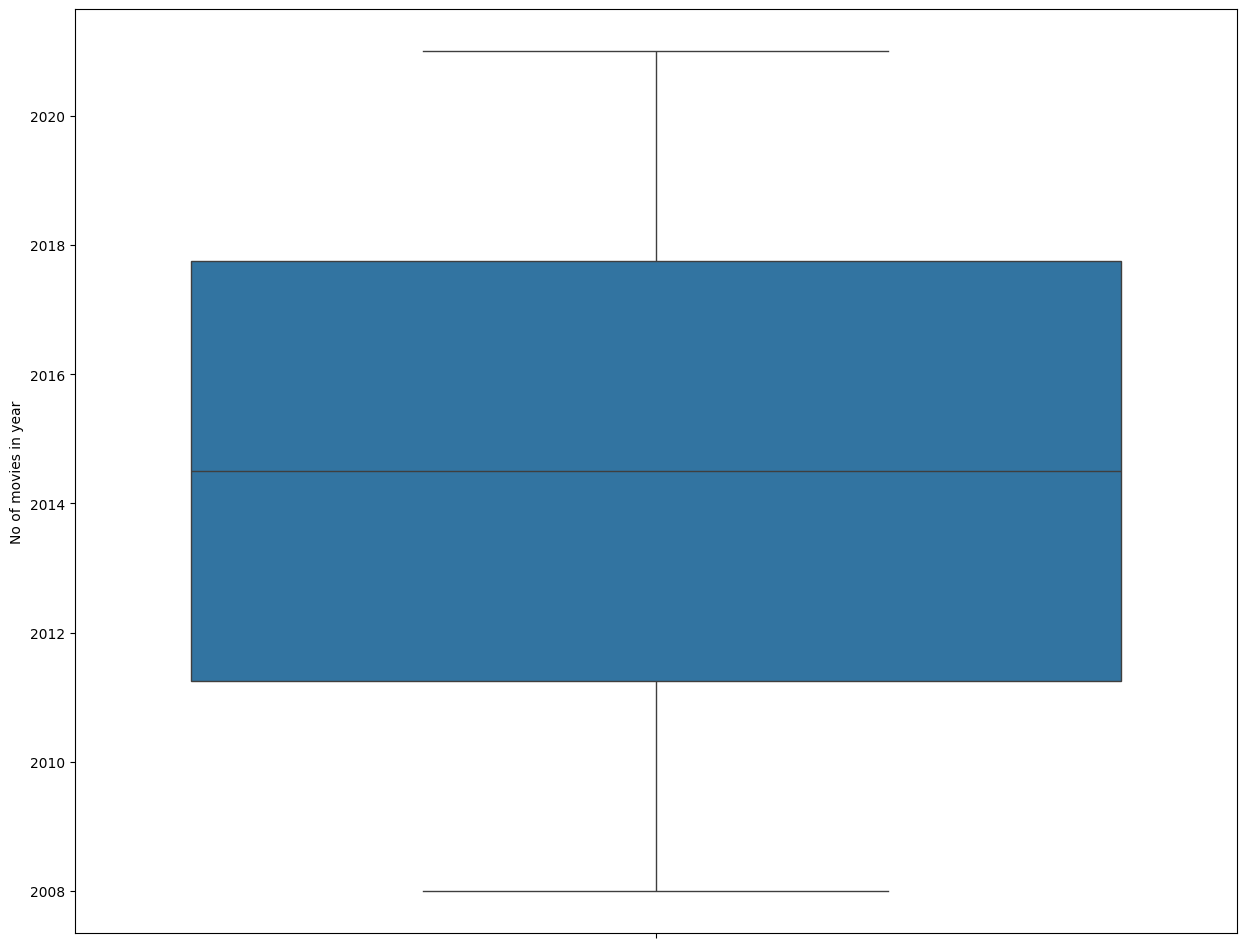

In [ ]:
df_final_year=df_final1.groupby(['year']).aggregate({'title':'nunique'}).reset_index()
plt.figure(figsize=(15,12))
sns.boxplot(data=df_final_year,y='year')
plt.ylabel('No of movies in year')
df_final_year['year'].astype('int').describe()

Bivariate Analysis:


find the no. of movies released every year

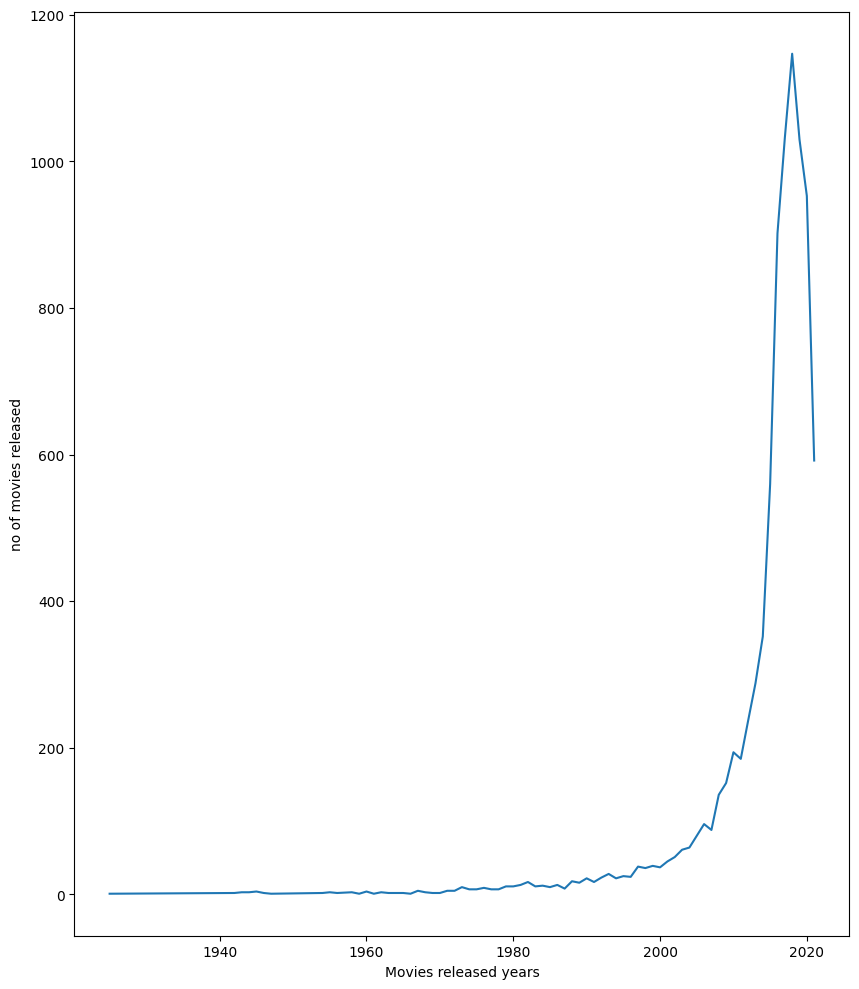

In [ ]:
df_final_year=df_final1.groupby('release_year').aggregate({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,12))
sns.lineplot(data=df_final_year,x='release_year',y='title')
plt.xlabel('Movies released years')
plt.ylabel('no of movies released')
plt.show()

It is come to see most of the movies in the Netflix are released in between 2017 and 2019

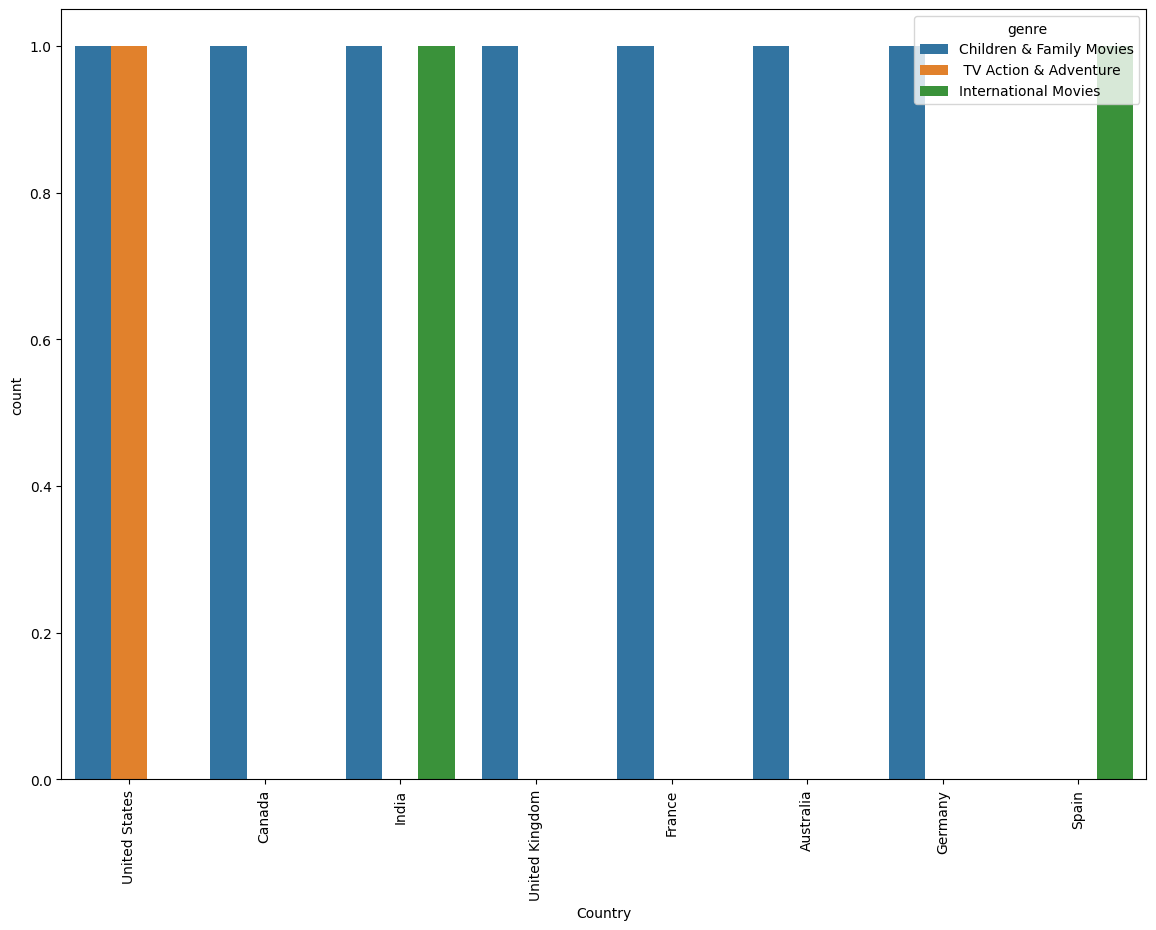

In [ ]:
df_final_country_genre=df_final1.groupby(['country','genre']).aggregate({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
df_final_country_genre['genre'].unique()
df_final_country_genre=df_final_country_genre[(df_final_country_genre['genre'] == 'International Movies')| (df_final_country_genre['genre'] =='Children & Family Movies') |(df_final_country_genre['genre'] ==' TV Action & Adventure')].head(10)
plt.figure(figsize=(14,10))
sns.countplot(df_final_country_genre,x='country',hue='genre')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.show()


In US we could see Children and Family  and Action and Adventure contents where as in India we could see Internation movie and Children and Family contents

In [ ]:
df_final1['genre'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
df_final_country_type=df_final1.groupby(['country','type']).aggregate({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
df_final_country_type=df_final_country_type.head(25)

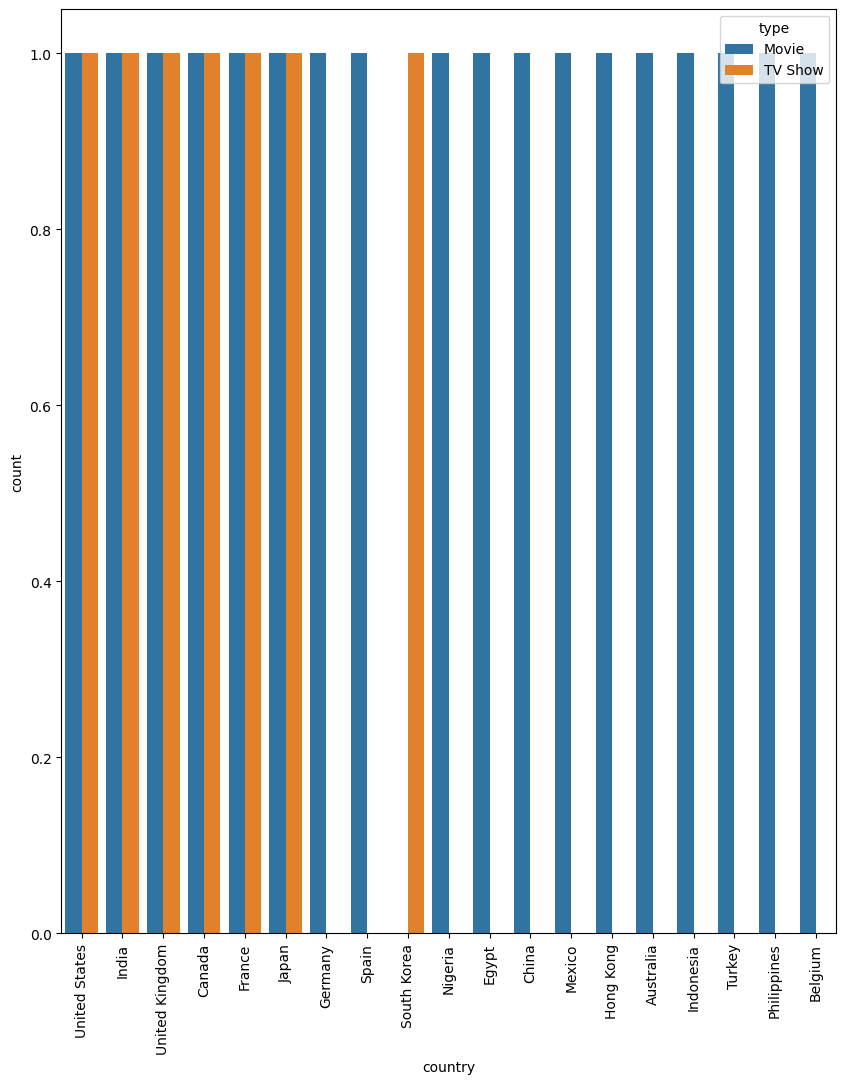

In [ ]:
plt.figure(figsize=(10,12))
sns.countplot(data=df_final_country_type,x='country',hue='type')
plt.xticks(rotation=90)
plt.show()

out of the top 25 dataset, United States, India, United Kingdom, Canada, France and Japan are equally watching both types movies and dramas content byt countries like Nigeria, Egypt, China, Mexica, Hongkong, Australi are watching movie type contents

In [ ]:
df_final1.dtypes

title                          object
director                       object
Actor                          object
genre                          object
country                        object
show_id                        object
type                           object
date_added                     object
release_year                    int64
rating                         object
duration                       object
Modified_Added_Date    datetime64[ns]
month_added                     int64
week_added                      int64
year                            int64
dtype: object

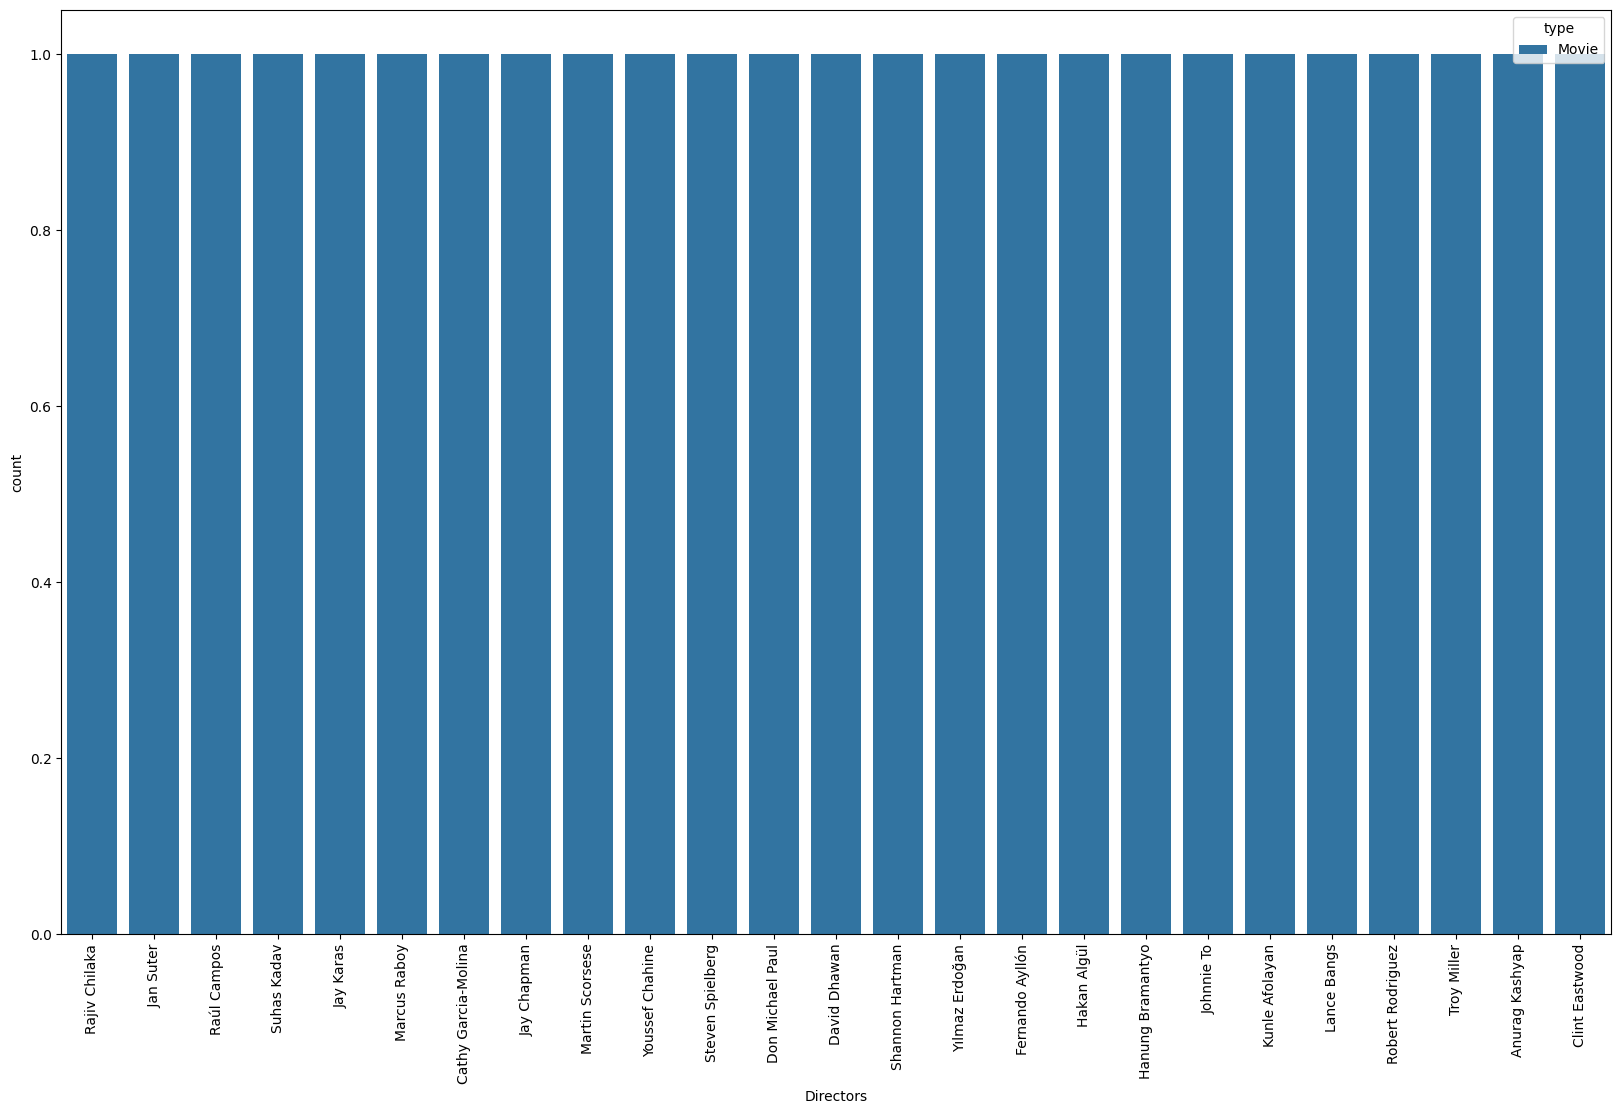

In [ ]:
df_final_director_type=df_final1.groupby(['director','type']).aggregate({'title':'nunique'}).sort_values(by=['title','type'],ascending=False).reset_index()
df_final_director_type=df_final_director_type[df_final_director_type['director']!='Unknown Director']
df_final_director_type=df_final_director_type.head(25)
# df_final_director_type_tail=df_final_director_type.tail(25)
plt.figure(figsize=(20,12))
sns.countplot(data=df_final_director_type,x='director',hue='type')
plt.xticks(rotation=90)
plt.xlabel('Directors')

plt.show()

Top content directors prefer movie type over TV show in the netflix content

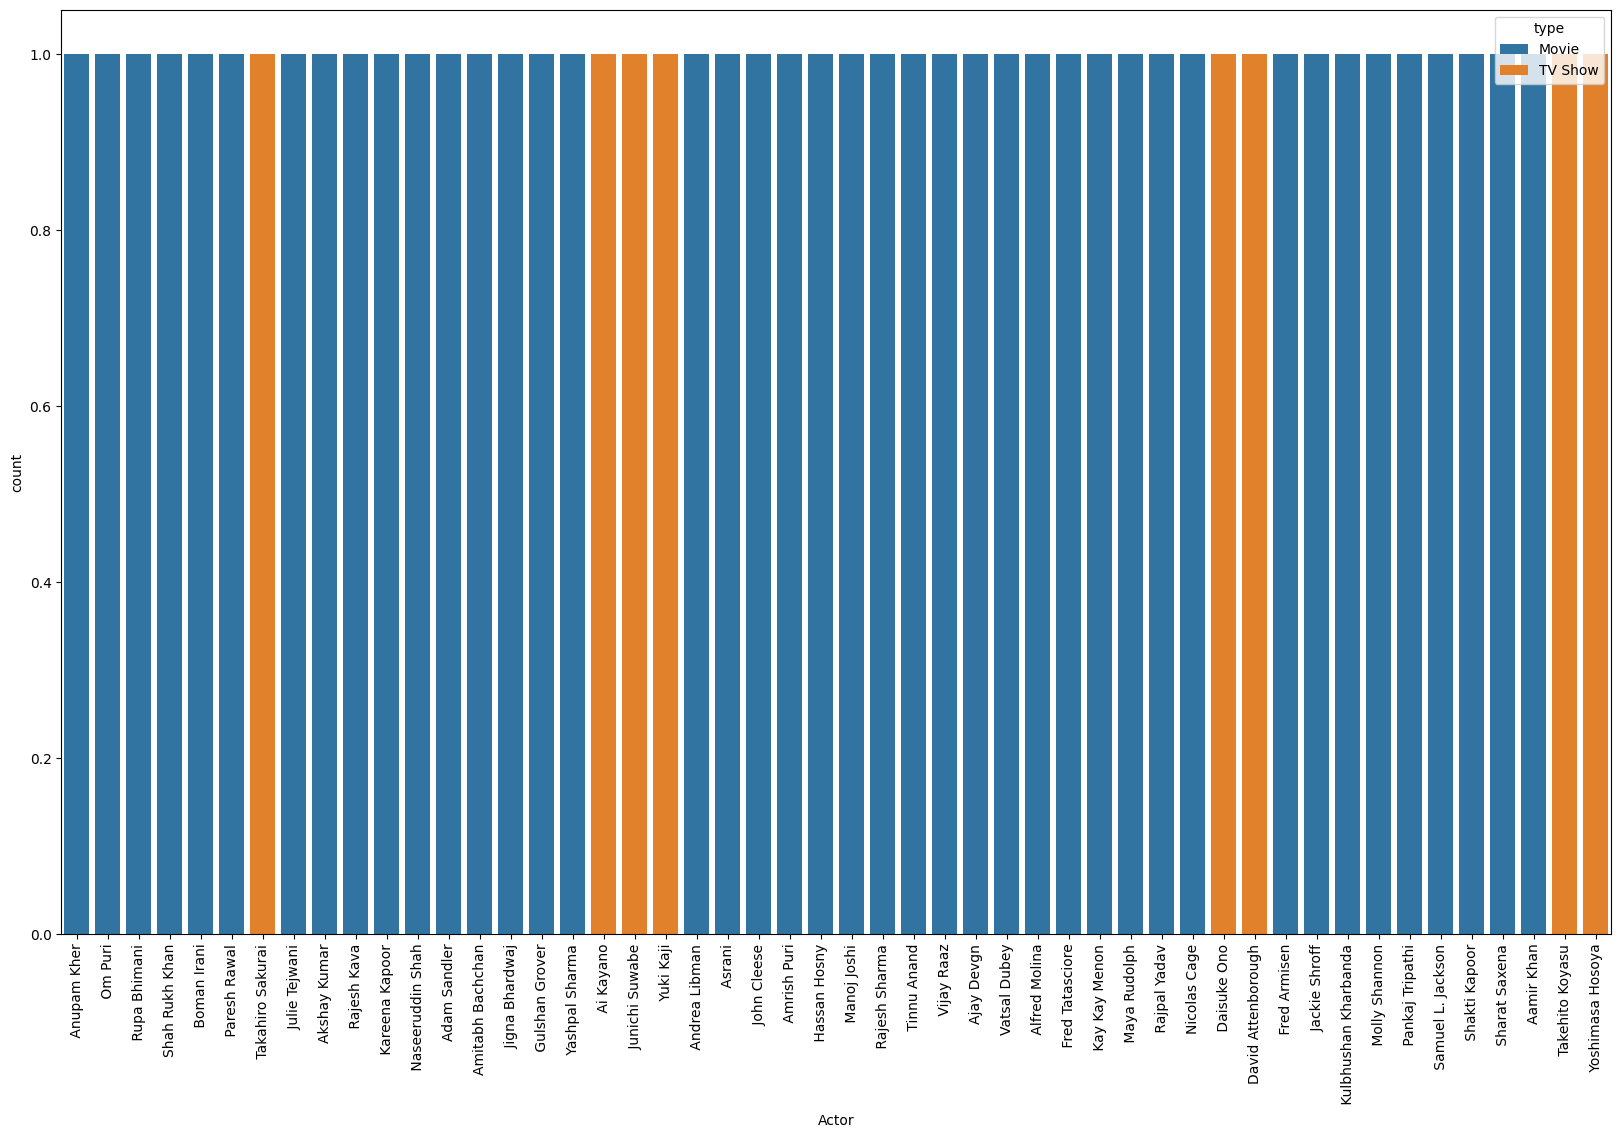

In [ ]:
df_final_Actor_type=df_final1.groupby(['Actor','type']).aggregate({'title':'nunique'}).sort_values(by=['title','type'],ascending=False).reset_index()
df_final_Actor_type=df_final_Actor_type[df_final_Actor_type['Actor']!='Unknown Actor']
df_final_Actor_type[df_final_Actor_type['type']=='TV Show']
df_final_Actor_type=df_final_Actor_type.head(50)
plt.figure(figsize=(20,12))
sns.countplot(data=df_final_Actor_type,x='Actor',hue='type')
plt.xticks(rotation=90)
plt.xlabel('Actor')

plt.show()

Anuphem Kher is the actor who appeared in many movies type content in the Netflix and Takahiro Sakurai is the actor who appeard in many TV drame type conten in the Netflix

4 C - Pairplots

<Figure size 1200x1000 with 0 Axes>

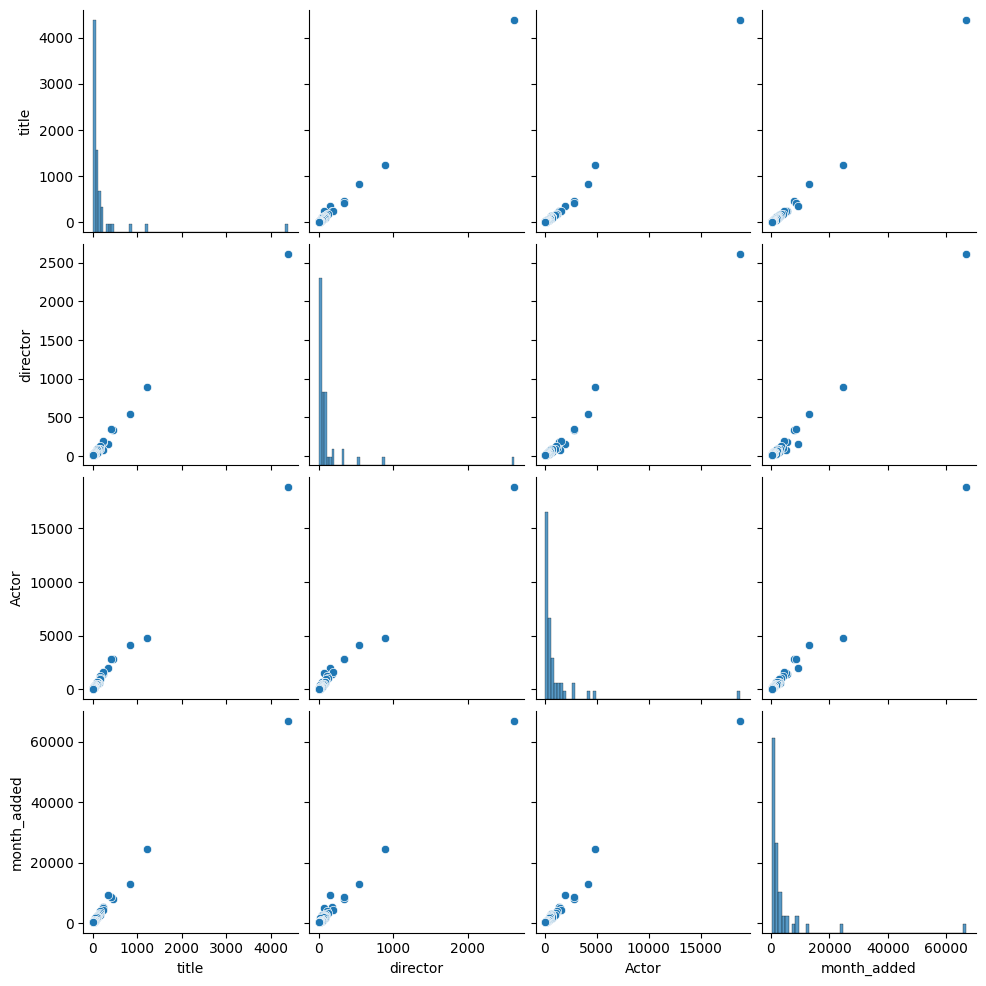

In [ ]:
df_final_director_actor=df_final1.groupby(['country']).aggregate({'title':'nunique','director':'nunique','Actor':'nunique','month_added':'count'}).reset_index().sort_values(by=['title'],ascending=False)
df_final_director_actor=df_final_director_actor[df_final_director_actor['director']!='Unknown Director'].head(50)
plt.figure(figsize=(12,10))
sns.pairplot(df_final_director_actor)
plt.show()


In [ ]:
df_final_director_actor.corr()

<ipython-input-82-feb415d1a03b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final_director_actor.corr()


,title,director,Actor,month_added
title,1.000000,0.996746,0.996038,0.995064
director,0.996746,1.000000,0.993646,0.995071
Actor,0.996038,0.993646,1.000000,0.992417
month_added,0.995064,0.995071,0.992417,1.000000


4 C - Correlation Heat Map

<ipython-input-83-0547006297b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final_director_actor.corr(),cmap="Blues",annot=True)


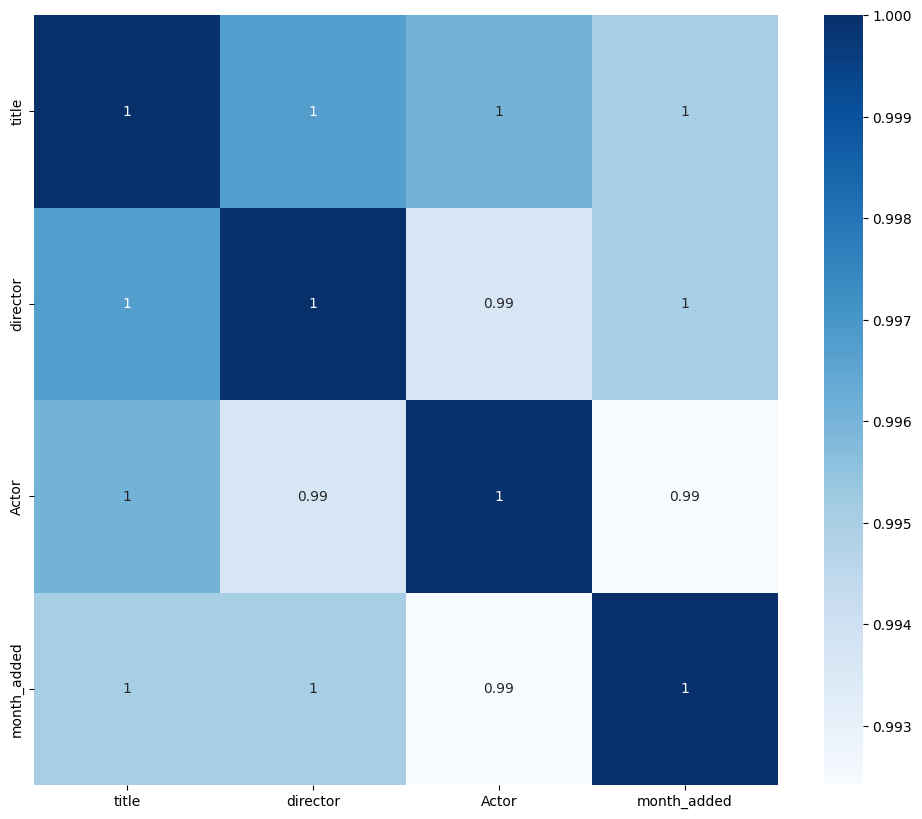

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_final_director_actor.corr(),cmap="Blues",annot=True)
plt.show()

director and actor have good corelation



7. Business Insights
*   There is a growing trend of content being added to the platform, particularly in the last decade.
*   Mature-rated content dominates the platform, suggesting that the audience demographic may skew older
*   The majority of TV shows are limited to one season, which could indicate a strategy of testing wide variety of content to see what gains popularity.

8. Recommendations


*   Quality Assurance: Review and correct data quality issues,particularly in the 'rating' and'duration' columns.
*   Content Strategy: Given the prevalence of mature content, consider balancing with more
family-friendly options to widen audience reach.
*   Season Renewal Analysis: Analyze the performance of single-season TV shows to determine
the potential for multi-season renewals based on viewer engagement and retention





In [ ]:
df.head()

NameError: name 'df' is not defined